In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
import numpy as np
import cv2
from os import listdir
from os.path import join as p_join
from os.path import abspath
from pathlib import Path 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
PROJDIR = '/content/drive/MyDrive/Computational Photography'
# print(PROJDIR)
DATA = p_join(PROJDIR, 'data')
# WIKIART = p_join(DATA, Emotion6')
%cd /content/drive/MyDrive/Computational Photography

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1tMW7kRVrirU9R4wxlCq58YDRba-UZ3Tr/Computational Photography


In [ ]:
# Read statistical data
df3= pd.read_csv("./wikiart_features_major.csv", index_col=0)
df3.head()

,Unnamed: 0.1,painting,repetition,prob_something else,prob_sadness,prob_contentment,prob_awe,prob_amusement,prob_excitement,prob_fear,...,energy,correlation,hue,saturation,brightness,Laplacian,contrast2,blue,green,red
0,5195.0,konstantinos-parthenis_landscape-1911,6.0,0.5,0.166667,0.333333,0.000000,0.000000,0.0,0.000000,...,0.025490,0.874241,65.967791,70.603794,125.370177,110.463916,29.548384,104.203116,112.394714,110.825072
1,26417.0,leon-berkowitz_cup-7-1975,5.0,0.6,0.200000,0.200000,0.000000,0.000000,0.0,0.000000,...,0.075868,0.980302,102.225970,122.137192,154.960231,22.240464,14.613010,140.922603,111.057325,97.669424
2,1042.0,tia-peltz_baba-cloan-a,6.0,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,...,0.006594,0.583508,30.734191,87.159674,146.431723,2655.182596,63.033411,99.545028,133.945142,143.244553
3,18571.0,ilya-repin_kubana-1883,6.0,0.5,0.000000,0.166667,0.166667,0.166667,0.0,0.000000,...,0.081234,0.716204,0.000000,0.000000,178.873058,2018.902083,91.632653,178.873058,178.873058,178.873058
4,9391.0,henri-fantin-latour_bowl-of-peaches-1869,6.0,0.5,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,...,0.011001,0.680647,64.879136,142.413508,104.004949,4726.317053,39.849356,51.653394,59.903208,103.995770


In [ ]:
df3.columns
df3['rand'] = np.random.rand(df3.shape[0])
df3['split']=df3['rand'].apply(lambda x: 'train' if x<0.7 else 'val')
df3.head()

,Unnamed: 0.1,painting,repetition,prob_something else,prob_sadness,prob_contentment,prob_awe,prob_amusement,prob_excitement,prob_fear,...,hue,saturation,brightness,Laplacian,contrast2,blue,green,red,rand,split
0,5195.0,konstantinos-parthenis_landscape-1911,6.0,0.5,0.166667,0.333333,0.000000,0.000000,0.0,0.000000,...,65.967791,70.603794,125.370177,110.463916,29.548384,104.203116,112.394714,110.825072,0.189717,train
1,26417.0,leon-berkowitz_cup-7-1975,5.0,0.6,0.200000,0.200000,0.000000,0.000000,0.0,0.000000,...,102.225970,122.137192,154.960231,22.240464,14.613010,140.922603,111.057325,97.669424,0.651226,train
2,1042.0,tia-peltz_baba-cloan-a,6.0,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,...,30.734191,87.159674,146.431723,2655.182596,63.033411,99.545028,133.945142,143.244553,0.506650,train
3,18571.0,ilya-repin_kubana-1883,6.0,0.5,0.000000,0.166667,0.166667,0.166667,0.0,0.000000,...,0.000000,0.000000,178.873058,2018.902083,91.632653,178.873058,178.873058,178.873058,0.349648,train
4,9391.0,henri-fantin-latour_bowl-of-peaches-1869,6.0,0.5,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,...,64.879136,142.413508,104.004949,4726.317053,39.849356,51.653394,59.903208,103.995770,0.624590,train


In [ ]:
df3['split'].value_counts()

train    1162
val       480
Name: split, dtype: int64

In [ ]:
data=df3

In [ ]:
data['split'].value_counts()

train    1162
val       480
Name: split, dtype: int64

In [ ]:
#Making train test X and Ys
ll=['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation', 'hue',
       'saturation', 'brightness', 'Laplacian', 'contrast2', 'blue', 'green',
       'red']

       
train_Y=pd.factorize(data[data['split']=='train']['Emotion'])[0]
train_X=data[data['split']=='train'][ll].values
print(train_X.shape,train_Y.shape)
test_Y=pd.factorize(data[data['split']=='val']['Emotion'])[0]
test_X=data[data['split']=='val'][ll].values
print(test_X.shape,test_Y.shape)

(1162, 14) (1162,)
(480, 14) (480,)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([('classifier' , RandomForestClassifier())])
# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,14,2))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_X, train_Y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
# Best Classifier score
best_clf.score(test_X,test_Y)

0.24791666666666667

In [ ]:
y_pred=best_clf.predict(test_X)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Classification Report
print(classification_report(test_Y,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        55
           1       0.23      0.28      0.26        60
           2       0.31      0.39      0.35        59
           3       0.23      0.17      0.19        53
           4       0.13      0.07      0.09        56
           5       0.34      0.32      0.33        68
           6       0.31      0.32      0.31        60
           7       0.11      0.15      0.13        54
           8       0.00      0.00      0.00        15

    accuracy                           0.25       480
   macro avg       0.21      0.22      0.22       480
weighted avg       0.24      0.25      0.24       480



Feature: contrast, Score: 0.00040
Feature: dissimilarity, Score: -0.07684
Feature: homogeneity, Score: 1.69613
Feature: ASM, Score: 0.00000
Feature: energy, Score: 0.00000
Feature: correlation, Score: -0.41487
Feature: hue, Score: 0.01147
Feature: saturation, Score: -0.00391
Feature: brightness, Score: -0.01040
Feature: Laplacian, Score: -0.00000
Feature: contrast2, Score: -0.00490
Feature: blue, Score: -0.00751
Feature: green, Score: 0.00492
Feature: red, Score: 0.01768


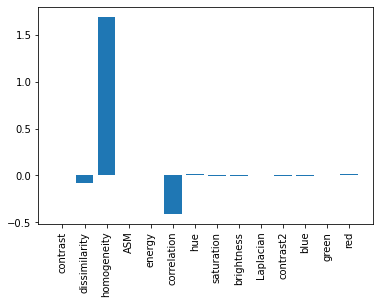

In [ ]:
from matplotlib import pyplot
importance = best_clf.best_estimator_.named_steps['classifier'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (ll[i],v))
# plot feature importance
pyplot.bar([ll[x] for x in range(len(importance))], importance)
pyplot.xticks(rotation=90)
pyplot.show()